Import

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [23]:
from datetime import datetime

data = pd.read_csv('cleandata.csv')

def creation_year(year):
    dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
    return dt.year

y = data.account_type.values.tolist()

def extract_features(x):
    columns=['favourites_count','followers_count','friends_count','statuses_count','verified','created']
    # x.loc[:,'created']= creation_year(x['created_at'])
    x.loc[:,'created'] = x.apply(lambda row :creation_year(row["created_at"]), axis=1)
    x=x.loc[:,columns]
    return x

x_train, x_test, y_train, y_test = train_test_split(extract_features(data), y, test_size=0.2, random_state=42)

Train the Suppport Vector Machines model

In [24]:
svc =  LinearSVC() 
%time svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 1.59 s, sys: 24 µs, total: 1.59 s
Wall time: 1.59 s

Training Accuracy score: 0.7485475792988314
Testing Accuracy score: 0.749198717948718


/home/safe/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Calculate the accuracy of the model

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_test)


0.749198717948718

Calculate the classification report of the model

In [26]:
print("classification_report \n "+classification_report(y_test, y_pred_test))

classification_report 
               precision    recall  f1-score   support

         bot       0.59      0.76      0.67      2455
       human       0.87      0.74      0.80      5033

    accuracy                           0.75      7488
   macro avg       0.73      0.75      0.73      7488
weighted avg       0.78      0.75      0.76      7488



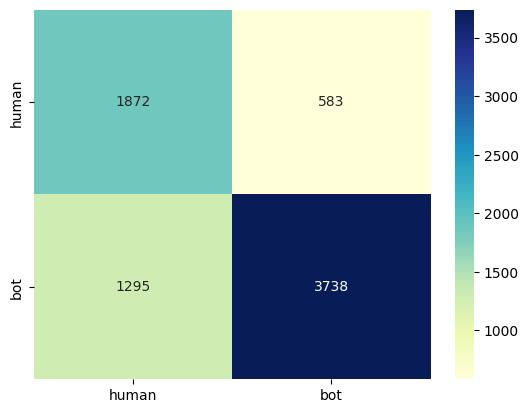

In [27]:
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
